# Movie Project

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, kruskal, ks_2samp, ttest_ind,normaltest
import re


In [2]:
from google.colab import files
import io
uploaded = files.upload()

Saving movieReplicationSet.csv to movieReplicationSet.csv


In [3]:
file_path = 'movieReplicationSet.csv'
df_raw = pd.read_csv(file_path)

df_raw.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [4]:
# Just delete the row with all null value
ratings_columns = df_raw.columns[:400]
df = df_raw.dropna(subset=ratings_columns, how='all')

print(df[ratings_columns].isnull().sum())

The Life of David Gale (2003)                1020
Wing Commander (1999)                        1025
Django Unchained (2012)                       643
Alien (1979)                                  807
Indiana Jones and the Last Crusade (1989)     633
                                             ... 
Patton (1970)                                1035
Anaconda (1997)                               898
Twister (1996)                                922
MacArthur (1977)                             1035
Look Who's Talking (1989)                     988
Length: 400, dtype: int64


1) Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies]


U-test statistic: 33427.5
p-value: 9.929258851707232e-35
More popular movies are rated significantly higher than less popular ones.


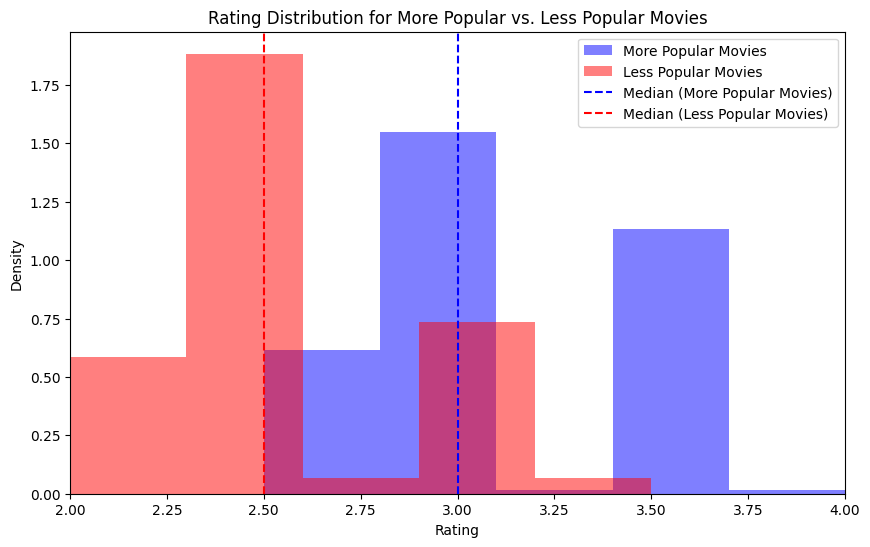

In [ ]:
movie_popularity = df[ratings_columns].count()
median_popularity = movie_popularity.median()
popularity_index = movie_popularity.index
# do a median-split of popularity to determine high vs. low popularity movies
more_popular_movies = df.loc[:, popularity_index[movie_popularity > median_popularity]]
less_popular_movies = df.loc[:, popularity_index[movie_popularity <= median_popularity]]
more_popular_medians = more_popular_movies.median(axis=0)
less_popular_medians = less_popular_movies.median(axis=0)

# Apply Mann-Whitney U-test instead of T-test cause we want to compare the ratings
stat, p_value = mannwhitneyu(more_popular_medians, less_popular_medians, alternative='greater')

print(f"U-test statistic: {stat}")
print(f"p-value: {p_value}")

if p_value < 0.005:
    print("More popular movies are rated significantly higher than less popular ones.")
else:
    print("No significant difference in ratings between more and less popular movies.")

 # Show the plot
plt.figure(figsize=(10,6))
plt.hist(more_popular_medians, bins=5, alpha=0.5, label='More Popular Movies', color='blue', density=True)
plt.hist(less_popular_medians, bins=5, alpha=0.5, label='Less Popular Movies', color='red', density=True)
plt.axvline(more_popular_medians.median(), color='blue', linestyle='--', label='Median (More Popular Movies)')
plt.axvline(less_popular_medians.median(), color='red', linestyle='--', label='Median (Less Popular Movies)')
plt.title('Rating Distribution for More Popular vs. Less Popular Movies')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.xlim(2, 4)
plt.legend()
plt.show()

2) Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of release to contrast movies in terms of whether they are old or new]

U-test statistic: 21061.0
p-value: 0.19865156776112602
There is no significant difference in ratings between newer and older movies.


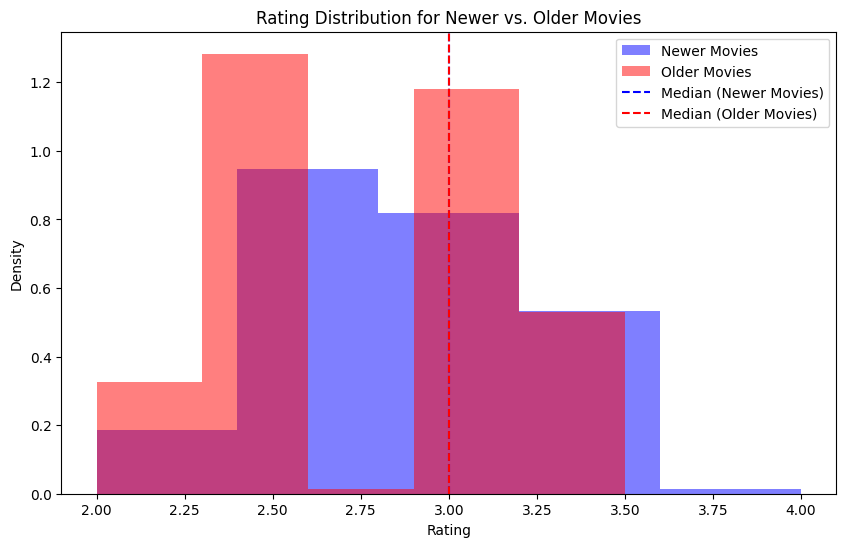

In [ ]:
#extract the year and restore in a list first
movie_years = []
for movie in df.columns[:400]:
    match = re.search(r'\((\d{4})\)', movie)
    if match:
        year = int(match.group(1))
        movie_years.append(year)
    else:
        movie_years.append(None)

# Split the movies into newer and older movies based on the median year
median_year = np.median([year for year in movie_years if year is not None])
newer_movies = df.iloc[:, :400].loc[:, [year > median_year for year in movie_years]]
older_movies = df.iloc[:, :400].loc[:, [year <= median_year for year in movie_years]]
newer_movie_medians = newer_movies.median(axis=0)
older_movie_medians = older_movies.median(axis=0)
# Perform two-sided Mann-Whitney U-test
stat, p_value = mannwhitneyu(newer_movie_medians, older_movie_medians, alternative='two-sided')

# Results show
print(f"U-test statistic: {stat}")
print(f"p-value: {p_value}")
if p_value < 0.005:
    print("There is a significant difference in ratings between newer and older movies.")
else:
    print("There is no significant difference in ratings between newer and older movies.")
# Plot histograms for newer and older movies, and the medians for newer and older movies
plt.figure(figsize=(10,6))
plt.hist(newer_movie_medians, bins=5, alpha=0.5, label='Newer Movies', color='blue', density=True)
plt.hist(older_movie_medians, bins=5, alpha=0.5, label='Older Movies', color='red', density=True)
plt.axvline(newer_movie_medians.median(), color='blue', linestyle='--', label='Median (Newer Movies)')
plt.axvline(older_movie_medians.median(), color='red', linestyle='--', label='Median (Older Movies)')
plt.title('Rating Distribution for Newer vs. Older Movies')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

3) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?


U-test statistic: 96830.5
p-value: 0.050536625925559006
There is no significant difference in how male and female viewers rate 'Shrek (2001)'.


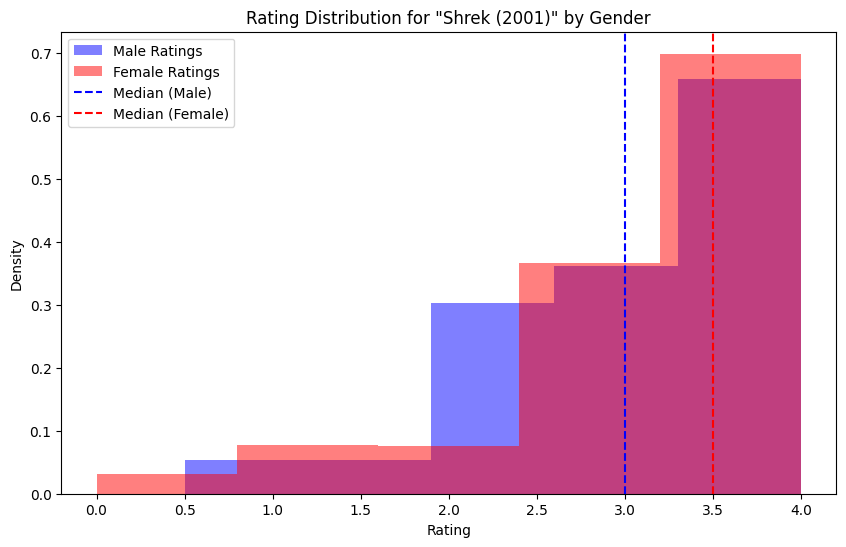

In [ ]:
# Extract the ratings for "Shrek (2001)" and drop missing values
shrek_ratings = df['Shrek (2001)'].dropna()
gender_column = df['Gender identity (1 = female; 2 = male; 3 = self-described)']
# Apply U test
male_ratings = shrek_ratings[gender_column == 2]
female_ratings = shrek_ratings[gender_column == 1]

stat, p_value = mannwhitneyu(female_ratings, male_ratings, alternative='two-sided')

# result show
print(f"U-test statistic: {stat}")
print(f"p-value: {p_value}")
if p_value < 0.005:
    print("There is a significant difference in how male and female viewers rate 'Shrek (2001)'.")
else:
    print("There is no significant difference in how male and female viewers rate 'Shrek (2001)'.")

plt.figure(figsize=(10,6))

# Plot histograms for male and female ratings
plt.hist(male_ratings, bins=5, alpha=0.5, label='Male Ratings', color='blue', density=True)
plt.hist(female_ratings, bins=5, alpha=0.5, label='Female Ratings', color='red', density=True)
plt.axvline(male_ratings.median(), color='blue', linestyle='--', label='Median (Male)')
plt.axvline(female_ratings.median(), color='red', linestyle='--', label='Median (Female)')
plt.title('Rating Distribution for "Shrek (2001)" by Gender')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

4) What proportion of movies are rated differently by male and female viewers?

Proportion of movies rated differently by gender: 0.125


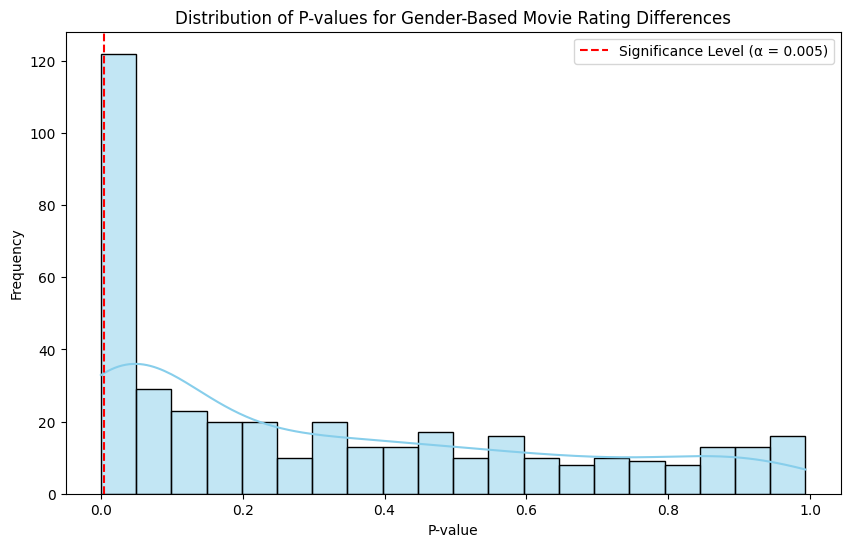

In [ ]:
# Extract movie rating columns and gender column
movie_ratings = df.iloc[:, :400]
gender = df['Gender identity (1 = female; 2 = male; 3 = self-described)']

# Initialize a counter for movies rated differently by gender
diff_gender_count = 0
p_values = []
alpha = 0.005  # Significance level set to 0.005

# Loop through each movie column to test rating differences by gender
for col in movie_ratings.columns:
    male_ratings = movie_ratings[col][gender == 2].dropna()  # Male viewers
    female_ratings = movie_ratings[col][gender == 1].dropna()  # Female viewers

# Perform Mann-Whitney U test between male and female ratings
    u_stat, p_value = mannwhitneyu(male_ratings, female_ratings, alternative='two-sided')
    p_values.append(p_value)

    # Check if p-value is below significance level
    if p_value < alpha:
        diff_gender_count += 1

# Calculate proportion of movies rated differently by gender
proportion_diff_gender = diff_gender_count / movie_ratings.shape[1]
print(f"Proportion of movies rated differently by gender: {proportion_diff_gender:.3f}")

# Plot the histogram of p-values with significance level indicated by dashed lines
plt.figure(figsize=(10, 6))
sns.histplot(p_values, bins=20, kde=True, color="skyblue")
plt.axvline(x=alpha, color='red', linestyle='--', linewidth=1.5, label=f'Significance Level (α = {alpha})')
plt.title("Distribution of P-values for Gender-Based Movie Rating Differences")
plt.xlabel("P-value")
plt.ylabel("Frequency")
plt.legend()

plt.show()

5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?


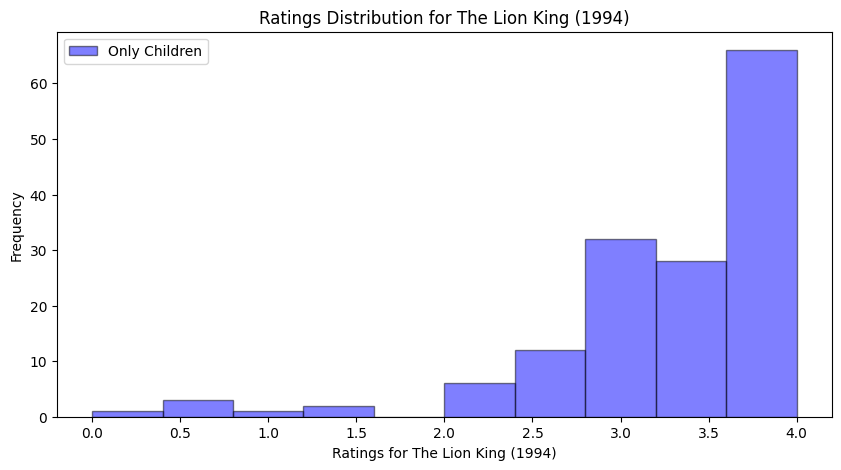

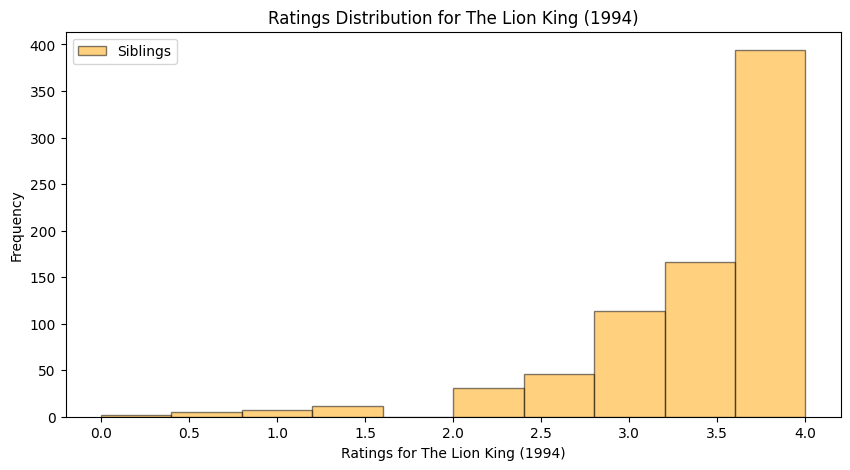

Question 5: U-statistic = 52929.0, p-value = 0.978419092554931


In [ ]:
lion_king_ratings = df['The Lion King (1994)']
only_child_ratings = lion_king_ratings[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1].dropna()
siblings_ratings = lion_king_ratings[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0].dropna()


# Plotting the histogram for 'Only Children'
plt.figure(figsize=(10, 5))
plt.hist(only_child_ratings, alpha=0.5, label='Only Children', bins=10, color='blue', edgecolor='black')
plt.xlabel('Ratings for The Lion King (1994)')
plt.ylabel('Frequency')
plt.title('Ratings Distribution for The Lion King (1994)')
plt.legend()
plt.show()

# Plotting the histogram for 'Siblings'
plt.figure(figsize=(10, 5))
plt.hist(siblings_ratings, alpha=0.5, label='Siblings', bins=10, color='orange', edgecolor='black')
plt.xlabel('Ratings for The Lion King (1994)')
plt.ylabel('Frequency')
plt.title('Ratings Distribution for The Lion King (1994)')
plt.legend()
plt.show()

# Conduct the one-sided Mann-Whitney U Test
stat, p_value = mannwhitneyu(only_child_ratings, siblings_ratings, alternative='greater')

# Reporting results
print(f"Question 5: U-statistic = {stat}, p-value = {p_value}")

6) What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?


Proportion of movies with significant only child effect: 0.0175


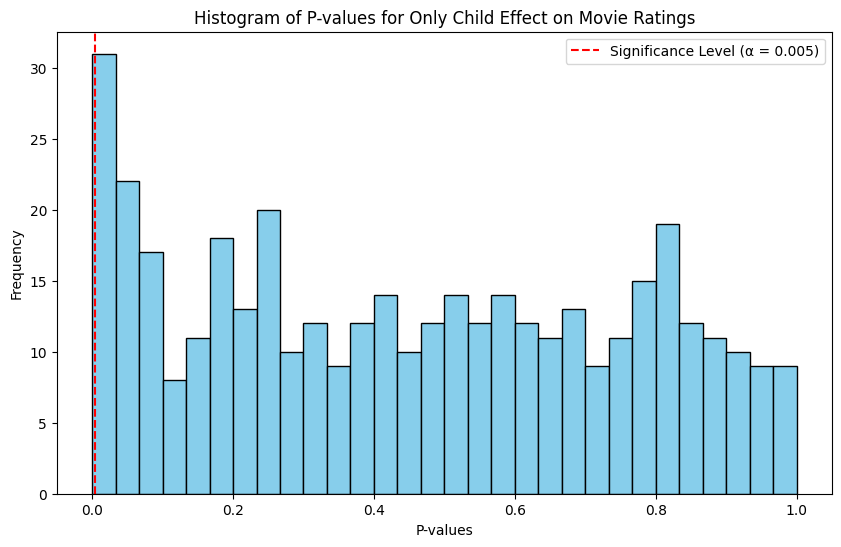

In [ ]:
# Define column ranges for movies and only child status
movie_columns = df.columns[0:400]  # Assuming the first 400 columns are movie ratings
only_child_column = 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)'

# Filter dataset for only child and non-only child ratings
only_child_ratings = df[df[only_child_column] == 1][movie_columns]
non_only_child_ratings = df[df[only_child_column] == 0][movie_columns]

# Initialize count for significant differences
significant_movies = 0

# Initialize variables for storing p-values
p_values = []
alpha = 0.005  # Significance level

# Perform Mann-Whitney U test on each movie
for movie in movie_columns:
    only_child_data = only_child_ratings[movie].dropna()
    non_only_child_data = non_only_child_ratings[movie].dropna()

    # Skip if there's insufficient data in either group
    if len(only_child_data) > 1 and len(non_only_child_data) > 1:
        # Perform Mann-Whitney U Test
        u_stat, p_value = mannwhitneyu(only_child_data, non_only_child_data, alternative='two-sided')

        # Check if p-value is below threshold
        if p_value < alpha:
            significant_movies += 1

        p_values.append(p_value)

# Calculate proportion of movies with significant only child effect
total_movies = len(movie_columns)
proportion_significant = significant_movies / total_movies
print("Proportion of movies with significant only child effect:", proportion_significant)

# Plot histogram of p-values
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=alpha, color='red', linestyle='dashed', linewidth=1.5, label=f'Significance Level (α = {alpha})')
plt.xlabel("P-values")
plt.ylabel("Frequency")
plt.title("Histogram of P-values for Only Child Effect on Movie Ratings")
plt.legend()
plt.show()

7) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?


U-test statistic: 49303.5
p-value: 0.1127642933222891
There is no significant difference in how people who like to watch movies socially and those who prefer to watch alone rate 'The Wolf of Wall Street (2013)'.


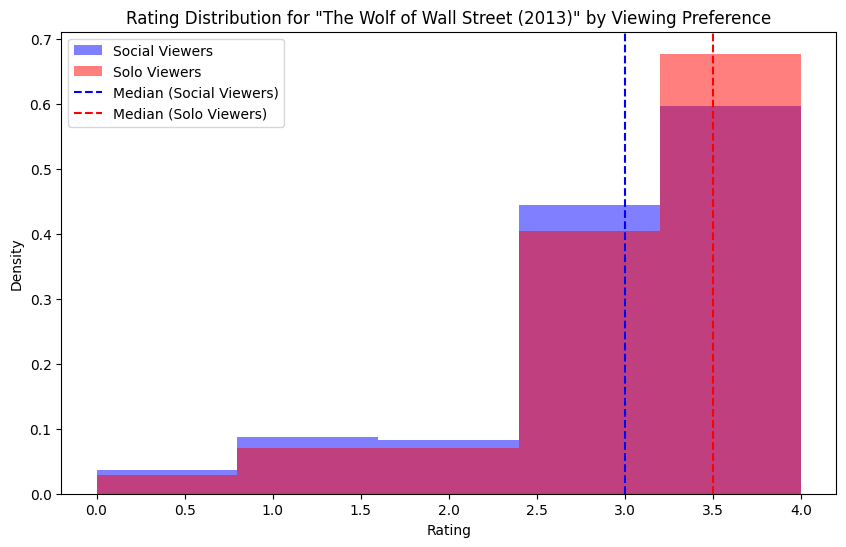

In [ ]:
# Extract the ratings for "The Wolf of Wall Street (2013)" and drop missing values
wolf_ratings = df['The Wolf of Wall Street (2013)'].dropna()
social_watching = df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']
social_watching = social_watching.astype(int)
social_ratings = wolf_ratings[social_watching == 0]
alone_ratings = wolf_ratings[social_watching == 1]
# Apply a two-sided Mann-Whitney U-test
stat, p_value = mannwhitneyu(social_ratings, alone_ratings, alternative='two-sided')

# result show
print(f"U-test statistic: {stat}")
print(f"p-value: {p_value}")
if p_value < 0.005:
    print("There is a significant difference in how people who like to watch movies socially and those who prefer to watch alone rate 'The Wolf of Wall Street (2013)'.")
else:
    print("There is no significant difference in how people who like to watch movies socially and those who prefer to watch alone rate 'The Wolf of Wall Street (2013)'.")

plt.figure(figsize=(10,6))
plt.hist(social_ratings, bins=5, alpha=0.5, label='Social Viewers', color='blue', density=True)
plt.hist(alone_ratings, bins=5, alpha=0.5, label='Solo Viewers', color='red', density=True)
plt.axvline(social_ratings.median(), color='blue', linestyle='--', label='Median (Social Viewers)')
plt.axvline(alone_ratings.median(), color='red', linestyle='--', label='Median (Solo Viewers)')
plt.title('Rating Distribution for "The Wolf of Wall Street (2013)" by Viewing Preference')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

8) What proportion of movies exhibit such a “social watching” effect?


Proportion of movies with a social watching effect: 0.025


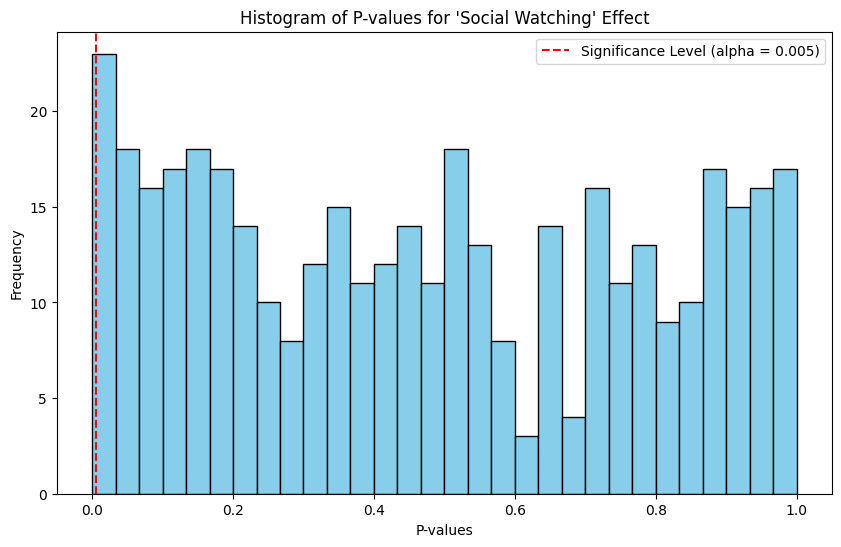

In [ ]:
# Filter people by social preference
social_pref = df[df.columns[476]]

# Initialize count of movies with a significant difference
significant_movies_count = 0
alpha = 0.005
p_values = []

# Loop through each movie column (1 to 400)
for movie_col in df.columns[:400]:
    # Get ratings for both groups
    # prefers socially
    ratings_social = df[movie_col][social_pref == 0]
    # prefers alone
    ratings_alone = df[movie_col][social_pref == 1]

    # Perform U test
    t_value, p_value = mannwhitneyu(ratings_social.dropna(), ratings_alone.dropna())
    p_values.append(p_value)

    if p_value < alpha:
        significant_movies_count += 1

# Calculate proportion
proportion_social_effect = significant_movies_count / 400
print(f"Proportion of movies with a social watching effect: {proportion_social_effect}")

# Draw the graph
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=30, edgecolor='black', color='skyblue')
plt.axvline(x=alpha, color='red', linestyle='--', label=f'Significance Level (alpha = {alpha})')
plt.xlabel('P-values')
plt.ylabel('Frequency')
plt.title("Histogram of P-values for 'Social Watching' Effect")
plt.legend()
plt.show()

9) Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?


p-value: 6.379397182836346e-10
The ratings distributions of 'Home Alone (1990)' and 'Finding Nemo (2003)' are significantly different.


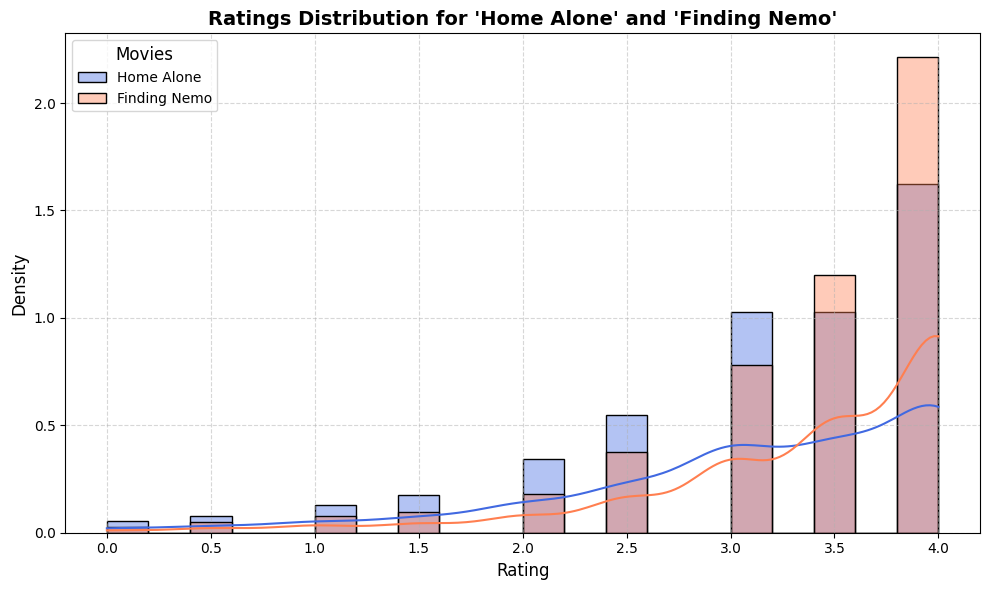

In [ ]:
home_alone_ratings = df['Home Alone (1990)'].dropna()
finding_nemo_ratings = df['Finding Nemo (2003)'].dropna()

# Perform KS test
_, p_value = ks_2samp(home_alone_ratings, finding_nemo_ratings)

# Print p
print(f"p-value: {p_value}")
alpha = 0.005

# Interpret results
if p_value < alpha:
    print("The ratings distributions of 'Home Alone (1990)' and 'Finding Nemo (2003)' are significantly different.")
else:
    print("The ratings distributions of 'Home Alone (1990)' and 'Finding Nemo (2003)' are NOT significantly different.")

# Draw the graph
plt.figure(figsize=(10, 6))
sns.histplot(home_alone_ratings, label='Home Alone', kde=True, color='royalblue', stat='density', bins=20, alpha=0.4, edgecolor='black')
sns.histplot(finding_nemo_ratings, label='Finding Nemo', kde=True, color='coral', stat='density', bins=20, alpha=0.4, edgecolor='black')

plt.xlabel('Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title("Ratings Distribution for 'Home Alone' and 'Finding Nemo'", fontsize=14, fontweight='bold')
plt.legend(title="Movies", fontsize=10, title_fontsize='12')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()


10) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]
Extra Credit: Tell us something interesting and true (supported by a significance test of some kind) about the movies in this dataset that is not already covered by the questions above [for 5% of the grade score].

In [ ]:
# Define franchise keywords
franchises = ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones',
              'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']

# Significance threshold
alpha = 0.005
inconsistent_franchises_count = 0

# Check each franchise
for franchise in franchises:
    franchise_cols = [col for col in df.columns[:400] if franchise in col]

    if franchise_cols and len(franchise_cols) > 1:
        # drop element-wise
        franchise_ratings = [df[movie].dropna() for movie in franchise_cols]

        # Perform Kruskal-Wallis test
        stat, p_value = kruskal(*franchise_ratings)

        # Check p value vs. alpha
        if p_value < alpha:
            inconsistent_franchises_count += 1
            print(f"{franchise} has inconsistent quality with p-value {p_value:.4e}")

print(f"Number of inconsistent franchises: {inconsistent_franchises_count}")

Star Wars has inconsistent quality with p-value 8.0165e-48
The Matrix has inconsistent quality with p-value 3.1237e-11
Indiana Jones has inconsistent quality with p-value 6.2728e-10
Jurassic Park has inconsistent quality with p-value 7.6369e-11
Pirates of the Caribbean has inconsistent quality with p-value 3.2901e-05
Toy Story has inconsistent quality with p-value 5.0658e-06
Batman has inconsistent quality with p-value 4.2253e-42
Number of inconsistent franchises: 7


**Extra Finding**


---


We are curious how the ratings change across the years

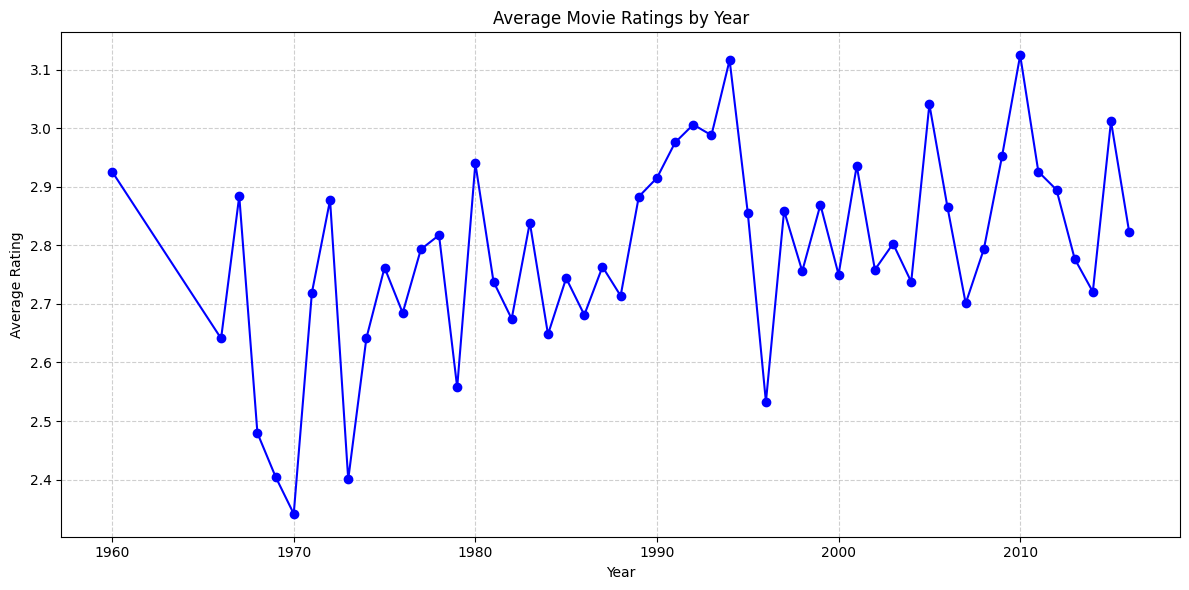

In [7]:
ratings_by_year = {}
for col in df.columns[:400]:
  # Extract the year
    match = re.search(r'\((\d{4})\)', col)
    if match:
        year = int(match.group(1))
        if year not in ratings_by_year:
            ratings_by_year[year] = []
        ratings_by_year[year].append(df[col].dropna())  # Append non-missing ratings for each year

# Calculate the average rating per year
years = sorted(ratings_by_year.keys())
avg_ratings = [pd.concat(ratings_by_year[year]).mean() for year in years]

# Plot the trend of average ratings over years
plt.figure(figsize=(12, 6))
plt.plot(years, avg_ratings, marker='o', color='b', linestyle='-', linewidth=1.5)
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Movie Ratings by Year")
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

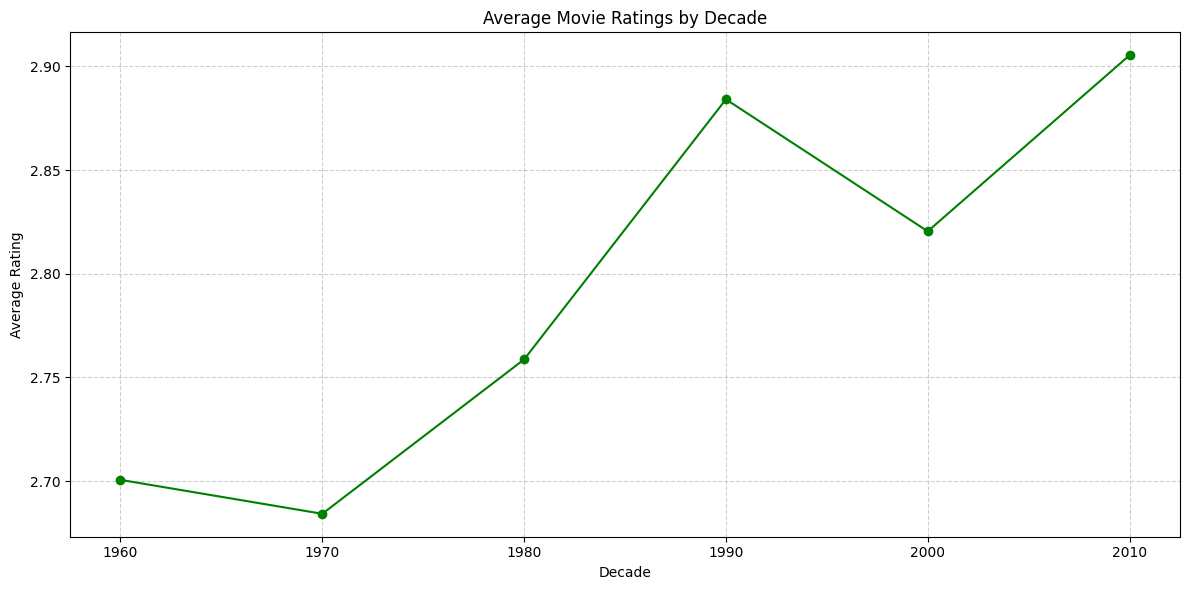

In [9]:
# Now group years into decades
ratings_by_decade = {}
for year in ratings_by_year:
# So, for a movie in 2005, it is one of the movies in 2000's
    decade = (year // 10) * 10
    if decade not in ratings_by_decade:
        ratings_by_decade[decade] = []
    ratings_by_decade[decade].extend(ratings_by_year[year])

# Calculate the average rating per decade
decades = sorted(ratings_by_decade.keys())
avg_ratings_decade = [pd.concat(ratings_by_decade[decade]).mean() for decade in decades]

# Plot the trend of average ratings by decade
plt.figure(figsize=(12, 6))
plt.plot(decades, avg_ratings_decade, marker='o', color='g', linestyle='-', linewidth=1.5)
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.title("Average Movie Ratings by Decade")
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()